### Problem Statement:

> <div style="text-align: justify">It is the year 2022 and we are at the verge of a massive climatic change. With global warming at its peak and fossil fuels inching towards its extinction, it is the need of the hour to step up and take responsibility for our planet. Developing countries all over the world are making a shift towards a cleaner energy source and are looking at ways to expand their global energy source power.</div>
> <div style="text-align: justify">Switching to renewable energy sources is a great way to reduce dependency on imported fuels and increase cost efficiency. It is time we move towards a low-carbon future by embracing solar, hydro, geothermal energy and so on, to protect mother nature.</div>
> <div style="text-align: justify">An efficient energy source that has been gaining popularity around the world is wind turbines. Wind turbines generate power by capturing the kinetic energy of the wind. Factors such as temperature, wind direction, turbine status, weather, blade length, and so on influence the amount of power generated.</div>

https://www.hackerearth.com/challenges/competitive/hackerearth-machine-learning-challenge-predict-windmill-power/

### Objective:

> <div style="text-align: justify">The objective is to build a sophisticated Machine Learning model that predicts the power that is generated (in KW/h) based on the various features provided in the dataset. To analyze and implement multiple algorithms and determine which is more appropriate for a problem To get hands-on experience in Machine Learning problems.</div>

### Problem solving approach:

0. <div style="text-align: justify">Splitting the data into train and test in 80:20 ratio. (Ratio can be modified based on rows of the dataset.)</div>

> - Every step from 1 to 5 needs to be performed without expoure to test data.
1. <div style="text-align: justify">Questioning the data - Understanding the variables very carefully and formulating
questions/hypothesis. (Note : These are just initial hypothesis which may or may not seem to be
true after the EDA step.)</div>
2. <div style="text-align: justify">EDA - Exploring the dataset very carefully by doing univariate analysis and bivariate analysis by choosing appropriate graphs, charts and descriptive measures. Reporting the surprising elements (i.e. the one which were believed would be true in step 1 did not turn out to be true, or a result that was beyond expectation, etc.)</div>
3. <div style="text-align: justify">Missing value imputation using various methods such as mean,median or KNN imputation
</div>
4. <div style="text-align: justify">Feature engineering - Suggesting some possible feature transformations (like log(X), sqrt(X), X^2, X1*X2, etc.) with reasons. Feature engineering. Suggesting some new feature generation techniques (e.g.: creating dummy variables, or using one-hot encoding, or transforming an existing feature to a new feature).</div>
5. <div style="text-align: justify">Model fitting step - Fitting various regression models by considering different sets of predictors on the training dataset. Argue the reasons for considering those predictor sets. Reporting k-fold cross-validation MAE, RMSE, R-squared and adjusted R-squared values. Choosing best model using hyperparameter tuning.</div>
6. <div style="text-align: justify">Model testing - Consider the best competing models from each algorithm and test their performances on the test data. Report the results.</div>

In [21]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>
#Code to left align Markdown tables

### Attribute Information :

|Column Name                       |Meaning|
|:---------------------------------|:------|
|tracking_id                       |ID of the Wind Turbine|
|datetime                          |Date and Time|
|wind_speed(m/s)                   |Speed of wind in m/s|
|atmospheric_temperature(°C)       |Atmospheric temperature in degree Celcius|
|shaft_temperature(°C)             |Wind Mill shaft temperature in degree Celcius |
|blades_angle(°)                   |Angle of blades in degree|
|gearbox_temperature(°C)           |Gear box temperature in degree Celcius|
|engine_temperature(°C)            |Engine temperature in degree Celcius|
|motor_torque(N-m)                 |Torque of Motor in N.m |
|generator_temperature(°C)         |Generator temperature in degree Celcius|
|atmospheric_pressure(Pascal)      |Atmospheric Pressure in Pascal|
|area_temperature(°C)              |Area temperature in degree Celcius|
|windmill_body_temperature(°C)     |Wind Mill body temperature in degree Celcius|
|wind_direction(°)                 |Wind direction in degree|
|resistance(ohm)                   |Winding resistance in Ohm|
|rotor_torque(N-m)                 |Rotor torque in N.m|
|turbine_status                    |Turbine Status(AAA, A2, AB, AC, A, ABC, BBB, BA, BB, B2, BCB, BD, B, D)|
|cloud_level                       |Cloud Level (Extremely Low, Low, Medium)|
|blade_length(m)                   |Length of blades in m|
|blade_breadth(m)                  |Bredth of blades in m|
|windmill_height(m)                |Height of Wind mill in m|
|windmill_generated_power(kW/h)    |Power generated by wind mill in kW/h|

> - <b>Note:</b> Column names have been slightly modified during EDA process done in R. To see the EDA process done on the original data please go through this jupyter notebook.
> - This notebook is focused on the various regression model fitting process only.

In [22]:
#Importing the necessary Libraries
import pandas as pd                                     #Pandas module mainly works with the tabular data             
import numpy as np                                      #NumPy module works with the numerical data
import seaborn as sns
import matplotlib.pyplot as plt                         #plotting libraries to plot the necessary graphs for EDA
import plotly.express as px                             #plotting libraries to plot the necessary graphs for EDA
import sklearn                                          #importing machine learning libraries
import statsmodels.api as stm   
from sklearn import linear_model
from sklearn.model_selection import cross_val_score     #for cross validation score calculation                       
from sklearn.tree import DecisionTreeRegressor          #for regression using decision tree
from sklearn.metrics import r2_score                    #to calculate R-squared value
from sklearn.metrics import mean_absolute_error         #to calculate MAE value
from sklearn.model_selection import train_test_split    #for doing test & train split of data
import sklearn.ensemble as ensemble
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

### 1) Reading the train data  

In [23]:
train = "https://raw.githubusercontent.com/KandarpChaudhary/Wind_Mill_Power_Prediction/main/Windmill_train_clean.csv"
df_train = pd.read_csv(train)                         #reading the cleaned train data from the repositry
df_train.shape                                        #checking the shape of the data

(22394, 23)

In [24]:
df_train.head(2)

,tracking_id,datetime,speed_wind,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,...,direction_wind,resistance,rotor_torque,turbine_status,cloud_level,blade_length,blade_breadth,height_windmill,windmill_generated_power,atmospheric_temperature_imp
0,WM_24537,2019-05-25 12:53:20,1.772478,0.868046,-7.188719,0.141416,40.254733,42.430519,822.481889,38.473050,...,218.229315,1246.371082,13.207233,AB,Low,8.300782,0.381435,26.538651,5.327000,True
1,WM_11995,2019-02-02 12:53:20,9.682917,17.556230,43.230546,14.359578,49.450861,43.948129,2839.818485,92.687648,...,313.837094,1953.054819,47.481954,BB,Medium,3.935231,0.471872,24.945305,13.769339,False


### 2) Reading the test data

In [25]:
test = "https://raw.githubusercontent.com/KandarpChaudhary/Wind_Mill_Power_Prediction/main/Windmill_test_clean.csv"
df_test = pd.read_csv(test)                          #reading the cleaned test data from the repositry
df_test.shape                                        #checking the shape of the data

(5599, 23)

In [26]:
df_test.head(2)

,tracking_id,datetime,speed_wind,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,...,direction_wind,resistance,rotor_torque,turbine_status,cloud_level,blade_length,blade_breadth,height_windmill,windmill_generated_power,atmospheric_temperature_imp
0,WM_51,2018-10-29 05:33:20,9.638635,49.323656,14.115891,5.952436,69.517702,43.447832,2859.880400,86.736871,...,152.663492,1976.228314,104.686191,D,Medium,1.216556,0.491366,25.361037,9.29106,True
1,WM_1441,2018-11-11 08:53:20,9.526949,25.834128,5.089377,0.786710,42.013690,41.115060,2040.684223,70.161484,...,271.147652,1698.318235,32.664450,BA,Medium,3.588249,0.357759,26.545724,3.96375,False


In [27]:
df_train.columns                  #listing the colummn names in the training data

Index(['tracking_id', 'datetime', 'speed_wind', 'atmospheric_temperature',
       'shaft_temperature', 'blades_angle', 'gearbox_temperature',
       'engine_temperature', 'motor_torque', 'generator_temperature',
       'atmospheric_pressure', 'area_temperature', 'body_temperature_windmill',
       'direction_wind', 'resistance', 'rotor_torque', 'turbine_status',
       'cloud_level', 'blade_length', 'blade_breadth', 'height_windmill',
       'windmill_generated_power', 'atmospheric_temperature_imp'],
      dtype='object')

In [28]:
df_test.columns                  #listing the colummn names in the testing data

Index(['tracking_id', 'datetime', 'speed_wind', 'atmospheric_temperature',
       'shaft_temperature', 'blades_angle', 'gearbox_temperature',
       'engine_temperature', 'motor_torque', 'generator_temperature',
       'atmospheric_pressure', 'area_temperature', 'body_temperature_windmill',
       'direction_wind', 'resistance', 'rotor_torque', 'turbine_status',
       'cloud_level', 'blade_length', 'blade_breadth', 'height_windmill',
       'windmill_generated_power', 'atmospheric_temperature_imp'],
      dtype='object')

> - atmospheric_temperature_imp column was created during the KNN imputation in R. We drop this column from our dataset

In [29]:
#creating seperate dataframe without tracking_id and datetime columns.
data_train = df_train.drop(columns = ["tracking_id", "datetime","turbine_status","atmospheric_temperature_imp"])
#rearranging the columns in the dataframe
data_train = data_train[['speed_wind', 'atmospheric_temperature', 'shaft_temperature',
       'blades_angle', 'gearbox_temperature', 'engine_temperature',
       'motor_torque', 'generator_temperature', 'atmospheric_pressure',
       'area_temperature', 'body_temperature_windmill', 'direction_wind',
       'resistance', 'rotor_torque', 'blade_length',
       'blade_breadth', 'height_windmill', 'cloud_level', 'windmill_generated_power']]
data_train.head(2)

,speed_wind,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,atmospheric_pressure,area_temperature,body_temperature_windmill,direction_wind,resistance,rotor_torque,blade_length,blade_breadth,height_windmill,cloud_level,windmill_generated_power
0,1.772478,0.868046,-7.188719,0.141416,40.254733,42.430519,822.481889,38.473050,95456.049051,22.861485,42.700917,218.229315,1246.371082,13.207233,8.300782,0.381435,26.538651,Low,5.327000
1,9.682917,17.556230,43.230546,14.359578,49.450861,43.948129,2839.818485,92.687648,94989.383195,37.057648,46.512083,313.837094,1953.054819,47.481954,3.935231,0.471872,24.945305,Medium,13.769339


In [30]:
#creating seperate dataframe without tracking_id and datetime columns.(test datset)
data_test = df_test.drop(columns = ["tracking_id", "datetime","turbine_status","atmospheric_temperature_imp"])
#rearranging the columns in the dataframe
data_test = data_test[['speed_wind', 'atmospheric_temperature', 'shaft_temperature',
       'blades_angle', 'gearbox_temperature', 'engine_temperature',
       'motor_torque', 'generator_temperature', 'atmospheric_pressure',
       'area_temperature', 'body_temperature_windmill', 'direction_wind',
       'resistance', 'rotor_torque', 'blade_length',
       'blade_breadth', 'height_windmill', 'cloud_level', 'windmill_generated_power']]
data_test.head(2)

,speed_wind,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,atmospheric_pressure,area_temperature,body_temperature_windmill,direction_wind,resistance,rotor_torque,blade_length,blade_breadth,height_windmill,cloud_level,windmill_generated_power
0,9.638635,49.323656,14.115891,5.952436,69.517702,43.447832,2859.880400,86.736871,94983.274938,48.767466,43.281459,152.663492,1976.228314,104.686191,1.216556,0.491366,25.361037,Medium,9.29106
1,9.526949,25.834128,5.089377,0.786710,42.013690,41.115060,2040.684223,70.161484,94978.385597,47.591146,43.281459,271.147652,1698.318235,32.664450,3.588249,0.357759,26.545724,Medium,3.96375


In [31]:
data = data_train.copy()             #copying the training data to a new dataframe

In [32]:
data.corr()                          #Finding the correlation between the features

,speed_wind,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,atmospheric_pressure,area_temperature,body_temperature_windmill,direction_wind,resistance,rotor_torque,blade_length,blade_breadth,height_windmill,windmill_generated_power
speed_wind,1.000000,0.327368,0.045923,-0.002996,0.036781,0.163508,0.400452,0.456577,-0.130756,0.214344,0.054874,-0.109364,0.282356,0.202933,0.011380,0.011480,-0.017940,0.067863
atmospheric_temperature,0.327368,1.000000,0.102002,0.020987,0.063555,0.286261,0.504045,0.607709,-0.157088,0.407500,0.121584,-0.226623,0.372349,0.245830,0.012100,-0.004281,-0.004985,0.003126
shaft_temperature,0.045923,0.102002,1.000000,-0.019933,0.070928,0.293558,0.103138,0.109934,-0.026533,0.134266,0.090285,-0.037022,0.062962,0.057792,0.008284,-0.006122,-0.004718,0.064228
blades_angle,-0.002996,0.020987,-0.019933,1.000000,-0.028705,-0.063427,-0.142274,-0.048102,0.007240,-0.077790,0.014521,-0.046563,-0.040101,-0.062855,-0.028960,-0.060543,0.002829,-0.154434
gearbox_temperature,0.036781,0.063555,0.070928,-0.028705,1.000000,0.211760,0.084602,0.082786,-0.012652,0.093804,0.064570,-0.021660,0.051892,0.044549,-0.000511,0.008955,0.003670,0.083821
engine_temperature,0.163508,0.286261,0.293558,-0.063427,0.211760,1.000000,0.354177,0.363897,-0.059942,0.339212,0.279119,-0.134664,0.240514,0.177619,0.008574,0.010347,-0.014370,0.272345
motor_torque,0.400452,0.504045,0.103138,-0.142274,0.084602,0.354177,1.000000,0.934042,-0.204670,0.467903,0.092940,-0.161600,0.591935,0.462392,0.025454,0.057888,-0.006502,0.506948
generator_temperature,0.456577,0.607709,0.109934,-0.048102,0.082786,0.363897,0.934042,1.000000,-0.227742,0.512491,0.113785,-0.230402,0.621134,0.444243,0.016471,0.020494,-0.007344,0.392140
atmospheric_pressure,-0.130756,-0.157088,-0.026533,0.007240,-0.012652,-0.059942,-0.204670,-0.227742,1.000000,-0.081499,-0.019243,0.050440,-0.144945,-0.090931,-0.009603,0.002404,0.005105,-0.008365
area_temperature,0.214344,0.407500,0.134266,-0.077790,0.093804,0.339212,0.467903,0.512491,-0.081499,1.000000,0.129902,-0.185693,0.304805,0.221370,0.012792,0.029299,-0.009343,0.385182


### 3) Fitting the Linear Regression model

**i) Simple Linear Regression**

Creating a simple Linear Regression model where we our fixing our target variable to windmill_generated_power and through a for loop we are iterating through all the columns in the dataset and finding out the cross validation score for R-square,RMSE and MAE metrics.

In [33]:
SLR_list = []                                   #creating a list to store tuple of predictor,R-square,RMSE and MAE.
regr = linear_model.LinearRegression()          #initializing the sklearn linear regression model
for i in range(0,np.shape(data.columns)[0]-2):  #iterating through all columns of dataset except id,date and price.
    scores1 = cross_val_score(regr,pd.DataFrame(data.iloc[:,i]),pd.DataFrame(data.windmill_generated_power),cv=10,scoring='r2')                          #cv score with R-square metric
    scores2 = cross_val_score(regr,pd.DataFrame(data.iloc[:,i]),pd.DataFrame(data.windmill_generated_power),cv=10,scoring='neg_root_mean_squared_error') #cv score with RMSE metric
    scores3 = cross_val_score(regr,pd.DataFrame(data.iloc[:,i]),pd.DataFrame(data.windmill_generated_power),cv=10,scoring='neg_mean_absolute_error')     #cv score with MAE metric
    SLR_list.append([data.columns[i],scores1.mean(),np.abs(scores2.mean()),np.abs(scores3.mean())])   #appending  the list to store tuple of predictor,R-square,RMSE and MAE.
SLR_Result = pd.DataFrame(SLR_list, columns = ["Predictor","R2","RMSE","MAE"])  #conerting the list to pandas dataframe
SLR_Result = SLR_Result.sort_values("R2", ascending=False)       #sorting a dataframe by R2 column
SLR_Result 

,Predictor,R2,RMSE,MAE
6,motor_torque,0.256518,2.332781,1.861701
7,generator_temperature,0.153259,2.489550,1.994147
9,area_temperature,0.147508,2.497838,1.977216
12,resistance,0.074245,2.603155,2.080381
5,engine_temperature,0.073747,2.603926,2.117946
13,rotor_torque,0.050428,2.636488,2.116844
3,blades_angle,0.023285,2.673882,2.151966
15,blade_breadth,0.007469,2.695443,2.182470
4,gearbox_temperature,0.006490,2.696790,2.177671
0,speed_wind,0.003903,2.700270,2.180438


In [34]:
SLR_list = list(SLR_Result.iloc[:,0])           #slicing the predictor column from SLR_Result dataframe
SLR_list.append('windmill_generated_power')     #appending the price to SLR_List    
df_1 = data.loc[:,SLR_list]                     #creating a dataframe with SLR_List elements as columns
df_1

,motor_torque,generator_temperature,area_temperature,resistance,engine_temperature,rotor_torque,blades_angle,blade_breadth,gearbox_temperature,speed_wind,shaft_temperature,direction_wind,blade_length,body_temperature_windmill,atmospheric_pressure,height_windmill,atmospheric_temperature,windmill_generated_power
0,822.481889,38.473050,22.861485,1246.371082,42.430519,13.207233,0.141416,0.381435,40.254733,1.772478,-7.188719,218.229315,8.300782,42.700917,95456.049051,26.538651,0.868046,5.327000
1,2839.818485,92.687648,37.057648,1953.054819,43.948129,47.481954,14.359578,0.471872,49.450861,9.682917,43.230546,313.837094,3.935231,46.512083,94989.383195,24.945305,17.556230,13.769339
2,783.336629,38.389250,27.141329,1213.762445,42.780595,75.872722,-99.000000,0.423538,41.283494,13.621533,41.908392,211.418321,3.634979,42.152071,95456.591535,27.179574,12.225137,4.653317
3,2462.892331,75.785483,43.115992,1793.423865,45.448606,39.874035,-1.303381,0.472443,23.077281,9.677077,46.760040,281.940488,3.588249,46.447843,94981.529368,24.512904,29.389378,6.242050
4,820.095464,40.228096,35.395953,1249.298814,42.984046,13.930545,-146.259543,0.477952,43.095891,1.990549,45.029645,265.470437,3.113394,41.749738,95488.640876,30.709111,11.665583,5.640274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22389,2768.572328,90.818861,47.234331,1963.687804,47.720643,45.592438,8.934412,0.446721,43.410321,9.580309,47.059804,150.369996,2.432157,45.383396,94983.570796,18.195162,28.164219,9.638072
22390,2568.299740,75.429751,28.327598,1871.758543,44.576726,40.005875,-1.181091,0.475222,45.273151,9.301166,74.200750,283.321772,9.551281,42.312827,94981.271346,25.297797,20.462774,7.956100
22391,2117.912224,71.260275,26.533481,2663.336874,42.717776,85.350760,-0.941538,0.477113,41.968212,9.177004,41.609807,225.199515,3.417728,40.947041,94978.449482,30.373202,21.905727,5.264841
22392,2892.444097,94.049498,40.869727,1990.248457,45.002920,46.133078,10.290330,0.440066,44.411914,9.537239,45.413325,143.222035,2.993950,43.281459,94992.222241,26.834483,24.827847,11.603679


In [35]:
print(SLR_list)

['motor_torque', 'generator_temperature', 'area_temperature', 'resistance', 'engine_temperature', 'rotor_torque', 'blades_angle', 'blade_breadth', 'gearbox_temperature', 'speed_wind', 'shaft_temperature', 'direction_wind', 'blade_length', 'body_temperature_windmill', 'atmospheric_pressure', 'height_windmill', 'atmospheric_temperature', 'windmill_generated_power']


In [36]:
df_2 = data_test.loc[:,SLR_list]                     #creating a dataframe with SLR_List elements as columns
df_2.head()

,motor_torque,generator_temperature,area_temperature,resistance,engine_temperature,rotor_torque,blades_angle,blade_breadth,gearbox_temperature,speed_wind,shaft_temperature,direction_wind,blade_length,body_temperature_windmill,atmospheric_pressure,height_windmill,atmospheric_temperature,windmill_generated_power
0,2859.880400,86.736871,48.767466,1976.228314,43.447832,104.686191,5.952436,0.491366,69.517702,9.638635,14.115891,152.663492,1.216556,43.281459,94983.274938,25.361037,49.323656,9.291060
1,2040.684223,70.161484,47.591146,1698.318235,41.115060,32.664450,0.786710,0.357759,42.013690,9.526949,5.089377,271.147652,3.588249,43.281459,94978.385597,26.545724,25.834128,3.963750
2,906.744353,41.469022,33.287076,1352.657976,44.173029,16.097340,-1.166295,0.454186,42.430585,3.412995,67.110962,271.147652,3.254225,43.281459,95469.780036,24.981134,12.741752,7.806675
3,2095.761541,71.403367,38.796153,774.412134,43.560637,36.332721,-0.045437,0.448268,42.283525,9.455225,42.992671,271.147652,4.991204,43.281459,94979.691703,25.994887,6.042805,3.806290
4,502.483282,34.977778,17.945284,1172.554732,4.466950,5.000000,92.738617,0.306947,3.100735,1.000000,8.523732,300.181509,4.854599,17.959089,95425.370252,25.284007,4.657620,7.549805


**ii) Multiple Linear Regression**

Creating a Multiple Linear Regression model where we our fixing our target variable to windmill_generated_power and through a for loop we are adding a new predictor in each iteration and finding out the cross validation score for R-square,RMSE and MAE metrics. We are making a DataFrame which consists of predictors used and the cv score metrics.

In [37]:
data = pd.get_dummies(data, columns=["cloud_level"], drop_first=True)               #encoding the categorical variable into a dummy variable
data.head()

,speed_wind,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,atmospheric_pressure,area_temperature,body_temperature_windmill,direction_wind,resistance,rotor_torque,blade_length,blade_breadth,height_windmill,windmill_generated_power,cloud_level_Low,cloud_level_Medium
0,1.772478,0.868046,-7.188719,0.141416,40.254733,42.430519,822.481889,38.473050,95456.049051,22.861485,42.700917,218.229315,1246.371082,13.207233,8.300782,0.381435,26.538651,5.327000,1,0
1,9.682917,17.556230,43.230546,14.359578,49.450861,43.948129,2839.818485,92.687648,94989.383195,37.057648,46.512083,313.837094,1953.054819,47.481954,3.935231,0.471872,24.945305,13.769339,0,1
2,13.621533,12.225137,41.908392,-99.000000,41.283494,42.780595,783.336629,38.389250,95456.591535,27.141329,42.152071,211.418321,1213.762445,75.872722,3.634979,0.423538,27.179574,4.653317,0,1
3,9.677077,29.389378,46.760040,-1.303381,23.077281,45.448606,2462.892331,75.785483,94981.529368,43.115992,46.447843,281.940488,1793.423865,39.874035,3.588249,0.472443,24.512904,6.242050,1,0
4,1.990549,11.665583,45.029645,-146.259543,43.095891,42.984046,820.095464,40.228096,95488.640876,35.395953,41.749738,265.470437,1249.298814,13.930545,3.113394,0.477952,30.709111,5.640274,1,0


In [38]:
data_test = pd.get_dummies(data_test, columns=["cloud_level"], drop_first=True)               #encoding the categorical variable into a dummy variable
data_test.head()

,speed_wind,atmospheric_temperature,shaft_temperature,blades_angle,gearbox_temperature,engine_temperature,motor_torque,generator_temperature,atmospheric_pressure,area_temperature,body_temperature_windmill,direction_wind,resistance,rotor_torque,blade_length,blade_breadth,height_windmill,windmill_generated_power,cloud_level_Low,cloud_level_Medium
0,9.638635,49.323656,14.115891,5.952436,69.517702,43.447832,2859.880400,86.736871,94983.274938,48.767466,43.281459,152.663492,1976.228314,104.686191,1.216556,0.491366,25.361037,9.291060,0,1
1,9.526949,25.834128,5.089377,0.786710,42.013690,41.115060,2040.684223,70.161484,94978.385597,47.591146,43.281459,271.147652,1698.318235,32.664450,3.588249,0.357759,26.545724,3.963750,0,1
2,3.412995,12.741752,67.110962,-1.166295,42.430585,44.173029,906.744353,41.469022,95469.780036,33.287076,43.281459,271.147652,1352.657976,16.097340,3.254225,0.454186,24.981134,7.806675,1,0
3,9.455225,6.042805,42.992671,-0.045437,42.283525,43.560637,2095.761541,71.403367,94979.691703,38.796153,43.281459,271.147652,774.412134,36.332721,4.991204,0.448268,25.994887,3.806290,0,1
4,1.000000,4.657620,8.523732,92.738617,3.100735,4.466950,502.483282,34.977778,95425.370252,17.945284,17.959089,300.181509,1172.554732,5.000000,4.854599,0.306947,25.284007,7.549805,0,1


In [39]:
df_1 = pd.concat([df_1, data[["cloud_level_Low","cloud_level_Medium"]]], axis=1)        #concating the dummy variable with the dataframe
#rearranging the features in the dataframe
df_1 = df_1[['windmill_generated_power','motor_torque', 'generator_temperature', 'area_temperature', 'resistance', 'engine_temperature', 'rotor_torque', 'blades_angle', 'blade_breadth', 'gearbox_temperature', 'speed_wind', 'shaft_temperature', 'direction_wind', 'blade_length', 'body_temperature_windmill', 'atmospheric_pressure', 'height_windmill', 'atmospheric_temperature', "cloud_level_Low","cloud_level_Medium"]]
df_1.head()

,windmill_generated_power,motor_torque,generator_temperature,area_temperature,resistance,engine_temperature,rotor_torque,blades_angle,blade_breadth,gearbox_temperature,speed_wind,shaft_temperature,direction_wind,blade_length,body_temperature_windmill,atmospheric_pressure,height_windmill,atmospheric_temperature,cloud_level_Low,cloud_level_Medium
0,5.327000,822.481889,38.473050,22.861485,1246.371082,42.430519,13.207233,0.141416,0.381435,40.254733,1.772478,-7.188719,218.229315,8.300782,42.700917,95456.049051,26.538651,0.868046,1,0
1,13.769339,2839.818485,92.687648,37.057648,1953.054819,43.948129,47.481954,14.359578,0.471872,49.450861,9.682917,43.230546,313.837094,3.935231,46.512083,94989.383195,24.945305,17.556230,0,1
2,4.653317,783.336629,38.389250,27.141329,1213.762445,42.780595,75.872722,-99.000000,0.423538,41.283494,13.621533,41.908392,211.418321,3.634979,42.152071,95456.591535,27.179574,12.225137,0,1
3,6.242050,2462.892331,75.785483,43.115992,1793.423865,45.448606,39.874035,-1.303381,0.472443,23.077281,9.677077,46.760040,281.940488,3.588249,46.447843,94981.529368,24.512904,29.389378,1,0
4,5.640274,820.095464,40.228096,35.395953,1249.298814,42.984046,13.930545,-146.259543,0.477952,43.095891,1.990549,45.029645,265.470437,3.113394,41.749738,95488.640876,30.709111,11.665583,1,0


In [40]:
df_2 = pd.concat([df_2, data_test[["cloud_level_Low","cloud_level_Medium"]]], axis=1)        #concating the dummy variable with the dataframe
#rearranging the features in the dataframe
df_2 = df_2[['windmill_generated_power','motor_torque', 'generator_temperature', 'area_temperature', 'resistance', 'engine_temperature', 'rotor_torque', 'blades_angle', 'blade_breadth', 'gearbox_temperature', 'speed_wind', 'shaft_temperature', 'direction_wind', 'blade_length', 'body_temperature_windmill', 'atmospheric_pressure', 'height_windmill', 'atmospheric_temperature', "cloud_level_Low","cloud_level_Medium"]]
df_2.head()

,windmill_generated_power,motor_torque,generator_temperature,area_temperature,resistance,engine_temperature,rotor_torque,blades_angle,blade_breadth,gearbox_temperature,speed_wind,shaft_temperature,direction_wind,blade_length,body_temperature_windmill,atmospheric_pressure,height_windmill,atmospheric_temperature,cloud_level_Low,cloud_level_Medium
0,9.291060,2859.880400,86.736871,48.767466,1976.228314,43.447832,104.686191,5.952436,0.491366,69.517702,9.638635,14.115891,152.663492,1.216556,43.281459,94983.274938,25.361037,49.323656,0,1
1,3.963750,2040.684223,70.161484,47.591146,1698.318235,41.115060,32.664450,0.786710,0.357759,42.013690,9.526949,5.089377,271.147652,3.588249,43.281459,94978.385597,26.545724,25.834128,0,1
2,7.806675,906.744353,41.469022,33.287076,1352.657976,44.173029,16.097340,-1.166295,0.454186,42.430585,3.412995,67.110962,271.147652,3.254225,43.281459,95469.780036,24.981134,12.741752,1,0
3,3.806290,2095.761541,71.403367,38.796153,774.412134,43.560637,36.332721,-0.045437,0.448268,42.283525,9.455225,42.992671,271.147652,4.991204,43.281459,94979.691703,25.994887,6.042805,0,1
4,7.549805,502.483282,34.977778,17.945284,1172.554732,4.466950,5.000000,92.738617,0.306947,3.100735,1.000000,8.523732,300.181509,4.854599,17.959089,95425.370252,25.284007,4.657620,0,1


In [41]:
MLR_list = []                                   #creating a list to store tuple of predictor,R-square,RMSE and MAE.
regr = linear_model.LinearRegression()          #initializing the sklearn linear regression model
for i in range(2,np.shape(df_1.columns)[0]+1):  #iterating through all columns of dataset df_1 except price
    scores1 = cross_val_score(regr,df_1.iloc[:,1:i],pd.DataFrame(df_1.windmill_generated_power),cv=10,scoring='r2')                          #cv score with R-square metric
    scores2 = cross_val_score(regr,df_1.iloc[:,1:i],pd.DataFrame(df_1.windmill_generated_power),cv=10,scoring='neg_root_mean_squared_error') #cv score with RMSE metric
    scores3 = cross_val_score(regr,df_1.iloc[:,1:i],pd.DataFrame(df_1.windmill_generated_power),cv=10,scoring='neg_mean_absolute_error')     #cv score with MAE metric
    MLR_list.append([list(df_1.columns[1:i]),scores1.mean(),np.abs(scores2.mean()),np.abs(scores3.mean())])  #appending  the list to store tuple of predictor,R-square,RMSE and MAE.
MLR_Result = pd.DataFrame(MLR_list, columns = ["Predictor","R2","RMSE","MAE"])    #conerting the list to pandas dataframe
MLR_Result

,Predictor,R2,RMSE,MAE
0,[motor_torque],0.256518,2.332781,1.861701
1,"[motor_torque, generator_temperature]",0.308448,2.249807,1.747753
2,"[motor_torque, generator_temperature, area_tem...",0.360546,2.163427,1.667018
3,"[motor_torque, generator_temperature, area_tem...",0.361117,2.162474,1.665971
4,"[motor_torque, generator_temperature, area_tem...",0.367399,2.151829,1.663595
5,"[motor_torque, generator_temperature, area_tem...",0.367355,2.151903,1.663687
6,"[motor_torque, generator_temperature, area_tem...",0.367382,2.151854,1.663312
7,"[motor_torque, generator_temperature, area_tem...",0.368473,2.149987,1.661351
8,"[motor_torque, generator_temperature, area_tem...",0.368668,2.149653,1.661046
9,"[motor_torque, generator_temperature, area_tem...",0.376312,2.136633,1.648115


#### iii) Forward Selection and Backward Elimination

In [42]:
##Forward Selection

In [43]:
#!pip3 install mlxtend

In [44]:
from mlxtend.feature_selection import SequentialFeatureSelector                 #importing the library for forward feature selection
regr = linear_model.LinearRegression()                                          #initialising a linear regressioin model
sfs = SequentialFeatureSelector(regr,k_features=8, forward=True, verbose=2, scoring='neg_mean_squared_error')      # setting predictors required as 8
sfs1 =sfs.fit(df_1.iloc[:,1:], df_1.windmill_generated_power)                   #fitting the model with predictors and the target variables

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.1s finished

[2022-07-19 19:21:12] Features: 1/8 -- score: -5.4424279462632[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.2s finished

[2022-07-19 19:21:12] Features: 2/8 -- score: -4.818227206295999[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.2s finished

[2022-07-19 19:21:12] Features: 3/8 -- score: -4.401459385772553[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 ou

In [45]:
feat_names_fs = list(sfs1.k_feature_names_)
cv = cross_val_score(regr,df_1.loc[:,feat_names_fs],pd.DataFrame(df_1.windmill_generated_power),cv=10,scoring='r2') 
print(feat_names_fs, np.mean(cv))

['motor_torque', 'generator_temperature', 'area_temperature', 'engine_temperature', 'blade_breadth', 'speed_wind', 'atmospheric_pressure', 'atmospheric_temperature'] 0.44039035651846453


In [46]:
##Backward elimination

In [47]:
from mlxtend.feature_selection import SequentialFeatureSelector                 #importing the library for forward feature selection
regr = linear_model.LinearRegression()                                          #initialising a linear regressioin model
sfs = SequentialFeatureSelector(regr,k_features=8, forward=False, verbose=2, scoring='neg_mean_squared_error')      # setting predictors required as 8, Forward=False denotes backward elimination to be used
sfs1 =sfs.fit(df_1.iloc[:,1:], df_1.windmill_generated_power)                   #fitting the model with predictors and the target variables

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.9s finished

[2022-07-19 19:21:15] Features: 18/8 -- score: -4.051361013821046[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.8s finished

[2022-07-19 19:21:16] Features: 17/8 -- score: -4.0512425096934335[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.7s finished

[2022-07-19 19:21:17] Features: 16/8 -- score: -4.051214678282109[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 

In [48]:
feat_names_be = list(sfs1.k_feature_names_)
cv = cross_val_score(regr,df_1.loc[:,feat_names_be],pd.DataFrame(df_1.windmill_generated_power),cv=10,scoring='r2') 
print(feat_names_be, np.mean(cv))

['motor_torque', 'generator_temperature', 'area_temperature', 'engine_temperature', 'speed_wind', 'atmospheric_temperature', 'cloud_level_Low', 'cloud_level_Medium'] 0.4414665743129125


### 4) Fitting the Decision Tree model

In [49]:
# Defining predictor columns in a list
l = ['motor_torque', 'generator_temperature',
       'area_temperature', 'resistance', 'engine_temperature', 'rotor_torque',
       'blades_angle', 'blade_breadth', 'gearbox_temperature', 'speed_wind',
       'shaft_temperature', 'direction_wind', 'blade_length',
       'body_temperature_windmill', 'atmospheric_pressure', 'height_windmill',
       'atmospheric_temperature', 'cloud_level_Low','cloud_level_Medium']

In [50]:
#hyperparameter tuning
x = df_1.loc[:,l]
cv = []                                  #defining list which will contain cv score for each Decidion Tree model
m = 999999999                            #variable to contain the minimum cv score 
k = list(range(7,13))                    #list of 7 to 13 minimum sample leaf
n = list(range(7,13))                    #list of 7 to 13 maximum tree depth
for i in k:                              #iterating through values of k to find optimum number of minimum sample leaf
    for j in n:                          #iterating through values of n to find optimum number of maximum tree depth
        Decision_tree = DecisionTreeRegressor(max_depth=j, min_samples_leaf=i, random_state=123) #Defining Decision tree regressor model
        scores = cross_val_score(Decision_tree, x, df_1.windmill_generated_power, cv=10, scoring='neg_root_mean_squared_error') #obtaining array of negative RMSE for each fold of cross validation
        a = np.abs(np.mean(scores))      #obtaining cv score by averaging absolute values of RMSE
        cv.append(a)                     #appending cv score to the list
        if np.abs(np.mean(scores)) < m:  #cv score is less than minimum cv score
            m = np.abs(np.mean(scores))  #update value of minimum cv score
            p = (j, i, m)                #creating tuple for minimum cv score and corresponding maximum tree depth & minimum sample leaf
print(p)

(12, 9, 0.6645219762477179)


In [51]:
#Decision tree with best hyperparameters
Decision_tree = DecisionTreeRegressor(max_depth=12, min_samples_leaf=9) #initializing the best decision tree
Decision_tree.fit(df_1.loc[:,l],df_1['windmill_generated_power'])   #fitting the decision tree model
scores = cross_val_score(Decision_tree, df_1.loc[:,l], df_1.windmill_generated_power, cv=10, scoring='r2')        #10-fold cross validation using r2 score
scores1 = cross_val_score(Decision_tree, df_1.loc[:,l], df_1.windmill_generated_power, cv=10, scoring='neg_root_mean_squared_error')   #10-fold cross  validation using rmse
np.mean(scores), np.mean(np.absolute(scores1))             #printing the mean scores

(0.938909915646617, 0.6645675254686688)

### 5) Fitting the bagging model


In [52]:
baggedModel = ensemble.BaggingRegressor(base_estimator=None, n_estimators=50, oob_score=True, random_state=123)         #initializing an ensemble bagging model   
baggedModel.fit(df_1.iloc[:,1:],df_1.windmill_generated_power)                                        #fitting an ensemble bagging model   
baggedModel.oob_score_                                                                                #getting the out of bag r2 score

0.957139891593306

### 6) Fitting the Random Forest model


In [53]:
randomForest = ensemble.RandomForestRegressor(n_estimators=50, max_features=0.5, oob_score=True, random_state=123)       #initializing an ensemble Random Forest model 
randomForest.fit(df_1.iloc[:,1:],df_1.windmill_generated_power)                                        #fitting an ensemble Random Forest model     
randomForest.oob_score_                                                                                #getting the out of bag r2 score

0.9591821847359128

In [54]:
#hyperparameter tuning
x = df_1.loc[:,l]
cv = []                                  #defining list which will contain cv score for each Random Forest model
m = 0                                    #variable to contain the minimum cv score 
k = list(range(90,100,2))                #list of 90 to 100 at interval of 2 for n_estimators
n = list(np.arange(0.3,0.7,0.1))         #list of 0.3 to 0.7 at interval of 0.1 for max_features
for i in k:                              #iterating through values of k to find optimum hyperparameters
      for j in n:                        #iterating through values of n to find optimum hyperparameters                     
        randomForest = ensemble.RandomForestRegressor(n_estimators=i, max_features=j, oob_score=True, random_state=123)  #initalising the model
        randomForest.fit(df_1.iloc[:,1:],df_1.windmill_generated_power)                                #fitting the model
        scores = randomForest.oob_score_ #getting the out of bag score
        a = np.abs(np.mean(scores))      #obtaining cv score by averaging absolute values of oob
        cv.append(a)                     #appending cv score to the list
        if np.abs(np.mean(scores)) > m:  #cv score is greater than minimum cv score
            m = np.abs(np.mean(scores))  #update value of minimum cv score
            p = (i,j, m)                 #creating tuple for minimum cv score and corresponding to best hyperparameters
print(p)

(94, 0.6000000000000001, 0.9616000913607707)


In [55]:
#model with optimised hyperparameters
randomForest = ensemble.RandomForestRegressor(n_estimators=p[0], max_features=p[1], oob_score=True, random_state=123)    #initializing an ensemble Random Forest model 
randomForest.fit(df_1.iloc[:,1:],df_1.windmill_generated_power)                                        #fitting an ensemble Random Forest model     
randomForest.oob_score_                                                                                #getting the out of bag r2 score

0.9616000913607707

In [56]:
#finding the best features with their importances
name = pd.Series(df_1.columns[1:])               #creating a new series of the feature names 
imp = pd.Series(randomForest.feature_importances_)          #creating a new series of feature importanes computed from the Random Forest model
pd.DataFrame({"Feature_name":name,"Feature Importance":imp}).sort_values("Feature Importance", ascending=False)     #arranging the sereis into dataframe and sorting in ascending order of feature importances

,Feature_name,Feature Importance
0,motor_torque,0.406236
1,generator_temperature,0.177189
6,blades_angle,0.176655
3,resistance,0.085384
14,atmospheric_pressure,0.050765
4,engine_temperature,0.030067
5,rotor_torque,0.020306
9,speed_wind,0.014098
8,gearbox_temperature,0.010109
7,blade_breadth,0.007340


### 7) Fitting the XGBoost Regression model


In [57]:
#!pip install xgboost

In [58]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import fbeta_score, make_scorer
from xgboost.sklearn import XGBRegressor

In [59]:
#making dictionary of all parameters for the model
parameters = {'objective':['reg:squarederror'],
              'booster':['gbtree','gblinear'],
              'learning_rate': [0.1], 
              'max_depth': [5,7,9],
              'min_child_weight': [10,15,25],
              'colsample_bytree': [0.5, 0.7, 0.3],
              'n_estimators': [50,100,200],
              "reg_alpha"   : [0.5,1,5]}

xg_reg = XGBRegressor(random_state=123) #initializing model with a random state for reproducibility
grid_obj_xgb = RandomizedSearchCV(xg_reg,parameters, cv=5,n_iter=20,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1, random_state=123) #10 Randomized search for 5-fold Cross Validation
grid_obj_xgb.fit(df_1.iloc[:,1:],df_1.windmill_generated_power,verbose = 1)

y_pred_train = grid_obj_xgb.predict(df_1.iloc[:,1:])

r2_xgb_train=r2_score(df_1.windmill_generated_power, y_pred_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.5min finished


In [60]:
RandomSearchCV_Results = pd.DataFrame()
for i in grid_obj_xgb.cv_results_['params']:
    RandomSearchCV_Results = pd.concat([RandomSearchCV_Results, pd.DataFrame(i.values(), index=list(i.keys())).T], axis=0, ignore_index=True)

In [61]:
RandomSearchCV_Results = pd.concat([RandomSearchCV_Results,
                                    pd.DataFrame(grid_obj_xgb.cv_results_['mean_fit_time'], columns=['mean_fit_time']),
                                    pd.DataFrame(-grid_obj_xgb.cv_results_['mean_test_score'], columns=['mean_cv_score']),
                                    pd.DataFrame(grid_obj_xgb.cv_results_['rank_test_score'], columns=['model_rank'])
                                   ], axis=1)
RandomSearchCV_Results.sort_values("model_rank")

,reg_alpha,objective,n_estimators,min_child_weight,max_depth,learning_rate,colsample_bytree,booster,mean_fit_time,mean_cv_score,model_rank
12,0.5,reg:squarederror,200,25,9,0.1,0.7,gbtree,36.172631,0.293561,1
16,0.5,reg:squarederror,100,15,7,0.1,0.7,gbtree,15.529199,0.293722,2
10,0.5,reg:squarederror,200,10,7,0.1,0.5,gbtree,23.124599,0.294090,3
0,0.5,reg:squarederror,50,25,9,0.1,0.5,gbtree,8.240827,0.313887,4
15,1,reg:squarederror,100,10,5,0.1,0.7,gbtree,10.355198,0.318467,5
11,0.5,reg:squarederror,50,15,7,0.1,0.5,gbtree,5.397600,0.321775,6
2,5,reg:squarederror,100,10,5,0.1,0.5,gbtree,6.434601,0.326941,7
18,0.5,reg:squarederror,50,15,5,0.1,0.5,gbtree,4.513199,0.366687,8
5,5,reg:squarederror,50,15,5,0.1,0.5,gbtree,3.278404,0.373703,9
8,0.5,reg:squarederror,50,10,9,0.1,0.3,gbtree,4.651600,0.400003,10


In [62]:
grid_obj_xgb.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=9, min_child_weight=25, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=123,
             reg_alpha=0.5, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
-grid_obj_xgb.best_score_

0.2935609763521029

In [64]:
grid_obj_xgb.best_params_

{'reg_alpha': 0.5,
 'objective': 'reg:squarederror',
 'n_estimators': 200,
 'min_child_weight': 25,
 'max_depth': 9,
 'learning_rate': 0.1,
 'colsample_bytree': 0.7,
 'booster': 'gbtree'}

In [66]:
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [67]:
#making dictionary of all parameters for the model
parameters = {'objective':['reg:squarederror'],
              'booster':['gbtree'],
              'learning_rate': [0.1], 
              'max_depth': [7,9],
              'min_child_weight': [10,15,25],
              'colsample_bytree': [0.5, 0.7],
              'n_estimators': [100,150,200],
              "reg_alpha"   : [0.5]}

xg_reg = XGBRegressor(random_state=123) #initializing model with a random state for reproducibility
grid_obj_xgb = GridSearchCV(xg_reg,parameters, cv=5,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1) #10 Randomized search for 5-fold Cross Validation
grid_obj_xgb.fit(df_1.iloc[:,1:],df_1.windmill_generated_power,verbose = 1)

y_pred_train = grid_obj_xgb.predict(df_1.iloc[:,1:])

r2_xgb_train=r2_score(df_1.windmill_generated_power, y_pred_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 12.1min finished


In [68]:
GridSearchCV_Results = pd.DataFrame()
for i in grid_obj_xgb.cv_results_['params']:
    GridSearchCV_Results = pd.concat([GridSearchCV_Results, pd.DataFrame(i.values(), index=list(i.keys())).T], axis=0, ignore_index=True)

In [69]:
GridSearchCV_Results = pd.concat([GridSearchCV_Results,
                                    pd.DataFrame(grid_obj_xgb.cv_results_['mean_fit_time'], columns=['mean_fit_time']),
                                    pd.DataFrame(-grid_obj_xgb.cv_results_['mean_test_score'], columns=['mean_cv_score']),
                                    pd.DataFrame(grid_obj_xgb.cv_results_['rank_test_score'], columns=['model_rank'])
                                   ], axis=1)
GridSearchCV_Results.sort_values("model_rank")

,booster,colsample_bytree,learning_rate,max_depth,min_child_weight,n_estimators,objective,reg_alpha,mean_fit_time,mean_cv_score,model_rank
20,gbtree,0.7,0.1,7,10,200,reg:squarederror,0.5,53.752162,0.288189,1
11,gbtree,0.5,0.1,9,10,200,reg:squarederror,0.5,38.615794,0.288426,2
19,gbtree,0.7,0.1,7,10,150,reg:squarederror,0.5,40.489563,0.288871,3
10,gbtree,0.5,0.1,9,10,150,reg:squarederror,0.5,28.576401,0.289076,4
30,gbtree,0.7,0.1,9,15,100,reg:squarederror,0.5,27.750001,0.289498,5
31,gbtree,0.7,0.1,9,15,150,reg:squarederror,0.5,47.913479,0.289811,6
27,gbtree,0.7,0.1,9,10,100,reg:squarederror,0.5,25.704458,0.290287,7
32,gbtree,0.7,0.1,9,15,200,reg:squarederror,0.5,66.929773,0.290351,8
28,gbtree,0.7,0.1,9,10,150,reg:squarederror,0.5,39.423455,0.290928,9
23,gbtree,0.7,0.1,7,15,200,reg:squarederror,0.5,34.791955,0.290955,10


In [70]:
grid_obj_xgb.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 10,
 'n_estimators': 200,
 'objective': 'reg:squarederror',
 'reg_alpha': 0.5}

In [71]:
data_dmatrix = xgb.DMatrix(data=df_1.iloc[:,1:],label=df_1.windmill_generated_power)

params = {'booster': 'gbtree',
 'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 10,
 'objective': 'reg:squarederror',
 'reg_alpha': 0.5}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=200,early_stopping_rounds=70,metrics="rmse", as_pandas=True, seed=123)

In [72]:
np.mean(cv_results)

train-rmse-mean    0.604552
train-rmse-std     0.005786
test-rmse-mean     0.767891
test-rmse-std      0.018136
dtype: float64

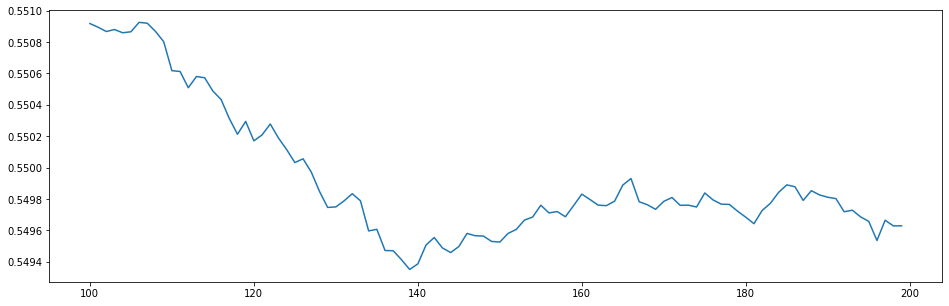

In [73]:
plt.figure(figsize = (16,5))
plt.plot(cv_results['test-rmse-mean'][100:])
plt.show()

### 8) Fitting the CatBoost Regression model

In [74]:
#!pip install catboost

In [75]:
from catboost import CatBoostRegressor

In [76]:
#making dictionary of all parameters for the model
parameters = {'eval_metric':['RMSE'],
              'learning_rate': [0.1], 
              'colsample_bylevel': [0.5,0.7,0.9],
              'max_depth': [5,7,9],
              'n_estimators': [50,100,200],
              'reg_lambda'   : [0.1,0.5,1,5]}

cat_reg = CatBoostRegressor(random_state=123) #initializing model with a random state for reproducibility
grid_obj_cat = RandomizedSearchCV(cat_reg,parameters, cv=5,n_iter=20,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1, random_state=123) #10 Randomized search for 5-fold Cross Validation
grid_obj_cat.fit(df_1.iloc[:,1:],df_1.windmill_generated_power,verbose = 1)

y_pred_train = grid_obj_cat.predict(df_1.iloc[:,1:])

r2_xgb_train=r2_score(df_1.windmill_generated_power, y_pred_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.9min finished


0:	learn: 2.5058755	total: 147ms	remaining: 29.2s
1:	learn: 2.3162371	total: 155ms	remaining: 15.3s
2:	learn: 2.1351766	total: 191ms	remaining: 12.5s
3:	learn: 1.9799801	total: 202ms	remaining: 9.91s
4:	learn: 1.8316175	total: 218ms	remaining: 8.5s
5:	learn: 1.6978022	total: 234ms	remaining: 7.56s
6:	learn: 1.5780245	total: 242ms	remaining: 6.66s
7:	learn: 1.4712577	total: 248ms	remaining: 5.96s
8:	learn: 1.3883559	total: 264ms	remaining: 5.61s
9:	learn: 1.3090424	total: 273ms	remaining: 5.19s
10:	learn: 1.2302388	total: 282ms	remaining: 4.85s
11:	learn: 1.1673511	total: 290ms	remaining: 4.55s
12:	learn: 1.1093557	total: 300ms	remaining: 4.32s
13:	learn: 1.0625557	total: 311ms	remaining: 4.13s
14:	learn: 1.0094740	total: 321ms	remaining: 3.96s
15:	learn: 0.9668767	total: 331ms	remaining: 3.81s
16:	learn: 0.9284764	total: 342ms	remaining: 3.68s
17:	learn: 0.8929337	total: 353ms	remaining: 3.57s
18:	learn: 0.8615498	total: 365ms	remaining: 3.48s
19:	learn: 0.8370373	total: 377ms	remainin

174:	learn: 0.4505486	total: 2.28s	remaining: 326ms
175:	learn: 0.4500560	total: 2.29s	remaining: 312ms
176:	learn: 0.4493074	total: 2.3s	remaining: 299ms
177:	learn: 0.4481968	total: 2.31s	remaining: 286ms
178:	learn: 0.4472745	total: 2.32s	remaining: 272ms
179:	learn: 0.4467121	total: 2.34s	remaining: 260ms
180:	learn: 0.4461126	total: 2.35s	remaining: 247ms
181:	learn: 0.4454136	total: 2.38s	remaining: 235ms
182:	learn: 0.4445646	total: 2.39s	remaining: 222ms
183:	learn: 0.4436537	total: 2.4s	remaining: 209ms
184:	learn: 0.4430947	total: 2.41s	remaining: 195ms
185:	learn: 0.4425552	total: 2.42s	remaining: 182ms
186:	learn: 0.4419239	total: 2.43s	remaining: 169ms
187:	learn: 0.4415564	total: 2.44s	remaining: 156ms
188:	learn: 0.4406036	total: 2.45s	remaining: 142ms
189:	learn: 0.4396117	total: 2.48s	remaining: 131ms
190:	learn: 0.4390529	total: 2.49s	remaining: 118ms
191:	learn: 0.4386099	total: 2.5s	remaining: 104ms
192:	learn: 0.4377742	total: 2.51s	remaining: 91.2ms
193:	learn: 0.

In [77]:
RandomSearchCV_Results = pd.DataFrame()
for i in grid_obj_cat.cv_results_['params']:
    RandomSearchCV_Results = pd.concat([RandomSearchCV_Results, pd.DataFrame(i.values(), index=list(i.keys())).T], axis=0, ignore_index=True)

In [78]:
RandomSearchCV_Results = pd.concat([RandomSearchCV_Results,
                                    pd.DataFrame(grid_obj_cat.cv_results_['mean_fit_time'], columns=['mean_fit_time']),
                                    pd.DataFrame(-grid_obj_cat.cv_results_['mean_test_score'], columns=['mean_cv_score']),
                                    pd.DataFrame(grid_obj_cat.cv_results_['rank_test_score'], columns=['model_rank'])
                                   ], axis=1)
RandomSearchCV_Results.sort_values("model_rank")

,reg_lambda,n_estimators,max_depth,learning_rate,eval_metric,colsample_bylevel,mean_fit_time,mean_cv_score,model_rank
7,0.1,200,7,0.1,RMSE,0.7,14.069586,0.311581,1
19,1,200,9,0.1,RMSE,0.7,16.831799,0.312385,2
1,0.1,100,9,0.1,RMSE,0.9,21.180649,0.333731,3
13,0.5,100,9,0.1,RMSE,0.7,10.728600,0.335637,4
9,0.1,200,5,0.1,RMSE,0.5,6.502795,0.338975,5
17,0.1,100,9,0.1,RMSE,0.5,8.524399,0.346899,6
16,0.1,100,7,0.1,RMSE,0.9,6.817998,0.347215,7
5,5,100,9,0.1,RMSE,0.5,16.597716,0.363031,8
4,1,50,9,0.1,RMSE,0.7,9.543413,0.382905,9
15,5,50,9,0.1,RMSE,0.7,5.608598,0.392402,10


In [79]:
grid_obj_cat.best_params_

{'reg_lambda': 0.1,
 'n_estimators': 200,
 'max_depth': 7,
 'learning_rate': 0.1,
 'eval_metric': 'RMSE',
 'colsample_bylevel': 0.7}

In [80]:
#making dictionary of all parameters for the model
parameters = {'eval_metric':['RMSE'],
              'learning_rate': [0.1], 
              'colsample_bylevel': [0.85,1],
              'max_depth': [7,8,9],
              'n_estimators': [150,200,300],
              'reg_lambda'   : [0.05,0.1,1]}

cat_reg = CatBoostRegressor(random_state=123) #initializing model with a random state for reproducibility
grid_obj_cat = GridSearchCV(cat_reg,parameters, cv=5,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1) #10 Randomized search for 5-fold Cross Validation
grid_obj_cat.fit(df_1.iloc[:,1:],df_1.windmill_generated_power,verbose = 1)

y_pred_train = grid_obj_cat.predict(df_1.iloc[:,1:])

r2_xgb_train=r2_score(df_1.windmill_generated_power, y_pred_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 17.6min finished


0:	learn: 2.4772507	total: 52.1ms	remaining: 15.6s
1:	learn: 2.2838797	total: 97.8ms	remaining: 14.6s
2:	learn: 2.1001918	total: 153ms	remaining: 15.1s
3:	learn: 1.9380428	total: 199ms	remaining: 14.8s
4:	learn: 1.7898728	total: 242ms	remaining: 14.3s
5:	learn: 1.6593662	total: 288ms	remaining: 14.1s
6:	learn: 1.5471920	total: 344ms	remaining: 14.4s
7:	learn: 1.4366548	total: 387ms	remaining: 14.1s
8:	learn: 1.3416882	total: 429ms	remaining: 13.9s
9:	learn: 1.2602072	total: 471ms	remaining: 13.7s
10:	learn: 1.1870687	total: 514ms	remaining: 13.5s
11:	learn: 1.1173320	total: 558ms	remaining: 13.4s
12:	learn: 1.0571431	total: 604ms	remaining: 13.3s
13:	learn: 1.0073254	total: 650ms	remaining: 13.3s
14:	learn: 0.9608684	total: 694ms	remaining: 13.2s
15:	learn: 0.9161397	total: 741ms	remaining: 13.2s
16:	learn: 0.8781432	total: 794ms	remaining: 13.2s
17:	learn: 0.8440010	total: 839ms	remaining: 13.1s
18:	learn: 0.8142110	total: 882ms	remaining: 13.1s
19:	learn: 0.7862027	total: 925ms	remai

165:	learn: 0.4062054	total: 7.56s	remaining: 6.1s
166:	learn: 0.4055587	total: 7.61s	remaining: 6.06s
167:	learn: 0.4047856	total: 7.66s	remaining: 6.01s
168:	learn: 0.4043779	total: 7.7s	remaining: 5.97s
169:	learn: 0.4038174	total: 7.74s	remaining: 5.92s
170:	learn: 0.4033373	total: 7.79s	remaining: 5.88s
171:	learn: 0.4027168	total: 7.84s	remaining: 5.83s
172:	learn: 0.4017803	total: 7.89s	remaining: 5.79s
173:	learn: 0.4010562	total: 7.95s	remaining: 5.75s
174:	learn: 0.4002620	total: 8s	remaining: 5.71s
175:	learn: 0.3995789	total: 8.05s	remaining: 5.67s
176:	learn: 0.3990751	total: 8.1s	remaining: 5.63s
177:	learn: 0.3986056	total: 8.14s	remaining: 5.58s
178:	learn: 0.3979438	total: 8.19s	remaining: 5.53s
179:	learn: 0.3967742	total: 8.23s	remaining: 5.49s
180:	learn: 0.3959647	total: 8.28s	remaining: 5.44s
181:	learn: 0.3954341	total: 8.32s	remaining: 5.4s
182:	learn: 0.3947415	total: 8.36s	remaining: 5.35s
183:	learn: 0.3934501	total: 8.4s	remaining: 5.3s
184:	learn: 0.3924140

In [81]:
GridSearchCV_Results = pd.DataFrame()
for i in grid_obj_cat.cv_results_['params']:
    GridSearchCV_Results = pd.concat([GridSearchCV_Results, pd.DataFrame(i.values(), index=list(i.keys())).T], axis=0, ignore_index=True)

In [82]:
GridSearchCV_Results = pd.concat([GridSearchCV_Results,
                                    pd.DataFrame(grid_obj_cat.cv_results_['mean_fit_time'], columns=['mean_fit_time']),
                                    pd.DataFrame(-grid_obj_cat.cv_results_['mean_test_score'], columns=['mean_cv_score']),
                                    pd.DataFrame(grid_obj_cat.cv_results_['rank_test_score'], columns=['model_rank'])
                                   ], axis=1)
GridSearchCV_Results.sort_values("model_rank")

,colsample_bylevel,eval_metric,learning_rate,max_depth,n_estimators,reg_lambda,mean_fit_time,mean_cv_score,model_rank
53,1,RMSE,0.1,9,300,1,53.293811,0.294298,1
17,0.85,RMSE,0.1,8,300,1,50.344311,0.296097,2
51,1,RMSE,0.1,9,300,0.05,70.694637,0.296506,3
34,1,RMSE,0.1,7,300,0.1,24.003552,0.296511,4
15,0.85,RMSE,0.1,8,300,0.05,51.509986,0.297985,5
33,1,RMSE,0.1,7,300,0.05,29.396825,0.300532,6
52,1,RMSE,0.1,9,300,0.1,68.398212,0.300595,7
24,0.85,RMSE,0.1,9,300,0.05,72.818020,0.301092,8
25,0.85,RMSE,0.1,9,300,0.1,71.435881,0.301120,9
16,0.85,RMSE,0.1,8,300,0.1,48.814425,0.301186,10


In [83]:
grid_obj_cat.best_params_

{'colsample_bylevel': 1,
 'eval_metric': 'RMSE',
 'learning_rate': 0.1,
 'max_depth': 9,
 'n_estimators': 300,
 'reg_lambda': 1}

In [84]:
#making dictionary of all parameters for the model
parameters = {'colsample_bylevel': [1],
 'eval_metric': ['RMSE'],
 'learning_rate': [0.1],
 'max_depth': [9],
 'n_estimators': [300],
 'reg_lambda': [1]}

cat_reg = CatBoostRegressor(random_state=123) #initializing model with a random state for reproducibility
grid_obj_cat = GridSearchCV(cat_reg,parameters, cv=3,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1) #10 Randomized search for 5-fold Cross Validation
grid_obj_cat.fit(df_1.iloc[:,1:],df_1.windmill_generated_power,verbose = 1)

y_pred_train = grid_obj_cat.predict(df_1.iloc[:,1:])

r2_xgb_train=r2_score(df_1.windmill_generated_power, y_pred_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   27.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   27.4s finished


0:	learn: 2.4772507	total: 33.7ms	remaining: 10.1s
1:	learn: 2.2838797	total: 69.5ms	remaining: 10.4s
2:	learn: 2.1001918	total: 107ms	remaining: 10.6s
3:	learn: 1.9380428	total: 145ms	remaining: 10.7s
4:	learn: 1.7898728	total: 186ms	remaining: 11s
5:	learn: 1.6593662	total: 229ms	remaining: 11.2s
6:	learn: 1.5471920	total: 272ms	remaining: 11.4s
7:	learn: 1.4366548	total: 325ms	remaining: 11.9s
8:	learn: 1.3416882	total: 368ms	remaining: 11.9s
9:	learn: 1.2602072	total: 411ms	remaining: 11.9s
10:	learn: 1.1870687	total: 453ms	remaining: 11.9s
11:	learn: 1.1173320	total: 499ms	remaining: 12s
12:	learn: 1.0571431	total: 555ms	remaining: 12.2s
13:	learn: 1.0073254	total: 610ms	remaining: 12.5s
14:	learn: 0.9608684	total: 663ms	remaining: 12.6s
15:	learn: 0.9161397	total: 720ms	remaining: 12.8s
16:	learn: 0.8781432	total: 771ms	remaining: 12.8s
17:	learn: 0.8440010	total: 819ms	remaining: 12.8s
18:	learn: 0.8142110	total: 864ms	remaining: 12.8s
19:	learn: 0.7862027	total: 907ms	remaining

162:	learn: 0.4093481	total: 7.48s	remaining: 6.29s
163:	learn: 0.4082819	total: 7.51s	remaining: 6.23s
164:	learn: 0.4076774	total: 7.55s	remaining: 6.18s
165:	learn: 0.4062054	total: 7.59s	remaining: 6.13s
166:	learn: 0.4055587	total: 7.63s	remaining: 6.08s
167:	learn: 0.4047856	total: 7.67s	remaining: 6.03s
168:	learn: 0.4043779	total: 7.71s	remaining: 5.97s
169:	learn: 0.4038174	total: 7.75s	remaining: 5.92s
170:	learn: 0.4033373	total: 7.79s	remaining: 5.87s
171:	learn: 0.4027168	total: 7.83s	remaining: 5.82s
172:	learn: 0.4017803	total: 7.86s	remaining: 5.77s
173:	learn: 0.4010562	total: 7.9s	remaining: 5.72s
174:	learn: 0.4002620	total: 7.94s	remaining: 5.67s
175:	learn: 0.3995789	total: 7.98s	remaining: 5.62s
176:	learn: 0.3990751	total: 8.02s	remaining: 5.57s
177:	learn: 0.3986056	total: 8.06s	remaining: 5.52s
178:	learn: 0.3979438	total: 8.1s	remaining: 5.47s
179:	learn: 0.3967742	total: 8.14s	remaining: 5.42s
180:	learn: 0.3959647	total: 8.18s	remaining: 5.38s
181:	learn: 0.

In [85]:
GridSearchCV_Results = pd.DataFrame()
for i in grid_obj_cat.cv_results_['params']:
    GridSearchCV_Results = pd.concat([GridSearchCV_Results, pd.DataFrame(i.values(), index=list(i.keys())).T], axis=0, ignore_index=True)
GridSearchCV_Results = pd.concat([GridSearchCV_Results,
                                    pd.DataFrame(grid_obj_cat.cv_results_['mean_fit_time'], columns=['mean_fit_time']),
                                    pd.DataFrame(-grid_obj_cat.cv_results_['mean_test_score'], columns=['mean_cv_score']),
                                    pd.DataFrame(grid_obj_cat.cv_results_['rank_test_score'], columns=['model_rank'])
                                   ], axis=1)
GridSearchCV_Results.sort_values("model_rank")

,colsample_bylevel,eval_metric,learning_rate,max_depth,n_estimators,reg_lambda,mean_fit_time,mean_cv_score,model_rank
0,1,RMSE,0.1,9,300,1,27.323022,0.308514,1


### 9) Fitting the LGBoost Regression model

In [89]:
#!pip install lightgbm

In [90]:
from lightgbm import LGBMRegressor

In [91]:
#making dictionary of all parameters for the model
parameters = {'objective':['regression'],
              'learning_rate': [0.1], 
              'max_depth': [5,7,9],
              'min_child_weight': [10,15,25],
              'colsample_bytree': [0.5, 0.7, 0.3],
              'n_estimators': [50,100,200],
              "reg_alpha"   : [0.5,1,5]}

lgb_reg = LGBMRegressor(random_state=123) #initializing model with a random state for reproducibility
grid_obj_lgb = RandomizedSearchCV(lgb_reg,parameters, cv=5,n_iter=20,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1, random_state=123) #10 Randomized search for 5-fold Cross Validation
grid_obj_lgb.fit(df_1.iloc[:,1:],df_1.windmill_generated_power,verbose = 1)

y_pred_train = grid_obj_lgb.predict(df_1.iloc[:,1:])

r2_lgb_train=r2_score(df_1.windmill_generated_power, y_pred_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   41.9s finished


In [92]:
RandomSearchCV_Results = pd.DataFrame()
for i in grid_obj_lgb.cv_results_['params']:
    RandomSearchCV_Results = pd.concat([RandomSearchCV_Results, pd.DataFrame(i.values(), index=list(i.keys())).T], axis=0, ignore_index=True)

In [93]:
RandomSearchCV_Results = pd.concat([RandomSearchCV_Results,
                                    pd.DataFrame(grid_obj_lgb.cv_results_['mean_fit_time'], columns=['mean_fit_time']),
                                    pd.DataFrame(-grid_obj_lgb.cv_results_['mean_test_score'], columns=['mean_cv_score']),
                                    pd.DataFrame(grid_obj_lgb.cv_results_['rank_test_score'], columns=['model_rank'])
                                   ], axis=1)
RandomSearchCV_Results.sort_values("model_rank")

,reg_alpha,objective,n_estimators,min_child_weight,max_depth,learning_rate,colsample_bytree,mean_fit_time,mean_cv_score,model_rank
2,0.5,regression,200,15,9,0.1,0.7,5.076144,0.298237,1
13,1,regression,200,10,9,0.1,0.7,4.398595,0.298474,2
7,5,regression,200,25,9,0.1,0.5,5.015319,0.301037,3
14,0.5,regression,200,15,7,0.1,0.5,4.451998,0.301285,4
17,1,regression,200,25,9,0.1,0.5,3.843597,0.302076,5
10,1,regression,200,25,7,0.1,0.5,4.638994,0.303790,6
4,1,regression,100,10,7,0.1,0.5,2.531004,0.310687,7
9,0.5,regression,200,25,5,0.1,0.5,3.429871,0.314423,8
11,1,regression,100,10,5,0.1,0.7,1.736398,0.317646,9
0,0.5,regression,200,10,9,0.1,0.3,5.159735,0.331057,10


In [94]:
#making dictionary of all parameters for the model
parameters = {'objective':['regression'],
              'learning_rate': [0.1], 
              'max_depth': [7,9,11,13,15],
              'min_child_weight': [10],
              'colsample_bytree': [0.6,0.7],
              'n_estimators': [300,400,500],
              "reg_alpha"   : [0.1,0.5,1]}

lgb_reg = LGBMRegressor(random_state=123) #initializing model with a random state for reproducibility
grid_obj_lgb = GridSearchCV(lgb_reg,parameters, cv=5,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1) #10 Randomized search for 5-fold Cross Validation
grid_obj_lgb.fit(df_1.iloc[:,1:],df_1.windmill_generated_power,verbose = 1)

y_pred_train = grid_obj_lgb.predict(df_1.iloc[:,1:])

r2_lgb_train=r2_score(df_1.windmill_generated_power, y_pred_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  5.5min finished


In [95]:
GridSearchCV_Results = pd.DataFrame()
for i in grid_obj_lgb.cv_results_['params']:
    GridSearchCV_Results = pd.concat([GridSearchCV_Results, pd.DataFrame(i.values(), index=list(i.keys())).T], axis=0, ignore_index=True)

In [96]:
GridSearchCV_Results = pd.concat([GridSearchCV_Results,
                                    pd.DataFrame(grid_obj_lgb.cv_results_['mean_fit_time'], columns=['mean_fit_time']),
                                    pd.DataFrame(-grid_obj_lgb.cv_results_['mean_test_score'], columns=['mean_cv_score']),
                                    pd.DataFrame(grid_obj_lgb.cv_results_['rank_test_score'], columns=['model_rank'])
                                   ], axis=1)
GridSearchCV_Results.sort_values("model_rank")

,colsample_bytree,learning_rate,max_depth,min_child_weight,n_estimators,objective,reg_alpha,mean_fit_time,mean_cv_score,model_rank
24,0.6,0.1,11,10,500,regression,0.1,6.295996,0.290947,1
21,0.6,0.1,11,10,400,regression,0.1,4.901595,0.291466,2
42,0.6,0.1,15,10,500,regression,0.1,6.378994,0.291630,3
35,0.6,0.1,13,10,500,regression,1,7.014394,0.291673,4
18,0.6,0.1,11,10,300,regression,0.1,4.500198,0.291836,5
...,...,...,...,...,...,...,...,...,...,...
63,0.7,0.1,11,10,300,regression,0.1,4.602795,0.297524,86
51,0.7,0.1,7,10,500,regression,0.1,6.588095,0.297587,87
48,0.7,0.1,7,10,400,regression,0.1,5.193792,0.297673,88
47,0.7,0.1,7,10,300,regression,1,4.090994,0.297803,89


In [97]:
grid_obj_lgb.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.1,
 'max_depth': 11,
 'min_child_weight': 10,
 'n_estimators': 500,
 'objective': 'regression',
 'reg_alpha': 0.1}

### 10) Testing of Models

In [136]:
model_list = []

In [137]:
#1. Fitting a simple Linear regression model and predicting using the test data
regr = linear_model.LinearRegression() 

regr.fit(data[["motor_torque"]], data[["windmill_generated_power"]])

ypred = regr.predict(df_2[["motor_torque"]])

In [138]:
#checking the scores on the test data
from sklearn.metrics import r2_score ,mean_squared_error, mean_absolute_error               
r2 = r2_score(data_test['windmill_generated_power'],ypred)
rmse = np.sqrt(mean_squared_error(data_test['windmill_generated_power'],ypred))
mae = np.sqrt(mean_absolute_error(data_test['windmill_generated_power'],ypred))
print(r2,rmse,mae)
model_list.append(["Simple Linear Regeression",r2,rmse,mae])


0.2468776243815305 2.309976013354612 1.3576806489177733


In [139]:
feat_names_fs

['motor_torque',
 'generator_temperature',
 'area_temperature',
 'engine_temperature',
 'blade_breadth',
 'speed_wind',
 'atmospheric_pressure',
 'atmospheric_temperature']

In [140]:
#2. Fitting a multiple Linear regression model in features obtained by forward selection and predicting using the test data
regr.fit(df_1.loc[:,feat_names_fs], df_1[["windmill_generated_power"]])

ypred = regr.predict(df_2.loc[:,feat_names_fs])

In [141]:
#checking the scores on the test data
from sklearn.metrics import r2_score ,mean_squared_error, mean_absolute_error               
r2 = r2_score(df_2['windmill_generated_power'],ypred)
rmse = np.sqrt(mean_squared_error(df_2['windmill_generated_power'],ypred))
mae = np.sqrt(mean_absolute_error(df_2['windmill_generated_power'],ypred))
print(r2,rmse,mae)
model_list.append(["Multiple Linear Regeression(Forward Selection)",r2,rmse,mae])

0.4208375893447488 2.0256988350647616 1.2449238644599878


In [142]:
feat_names_be

['motor_torque',
 'generator_temperature',
 'area_temperature',
 'engine_temperature',
 'speed_wind',
 'atmospheric_temperature',
 'cloud_level_Low',
 'cloud_level_Medium']

In [143]:
#3. Fitting a multiple Linear regression model in features obtained by backward elemination and predicting using the test data
regr.fit(df_1.loc[:,feat_names_be], df_1[["windmill_generated_power"]])

ypred = regr.predict(df_2.loc[:,feat_names_be])

In [144]:
#checking the scores on the test data
from sklearn.metrics import r2_score ,mean_squared_error, mean_absolute_error               
r2 = r2_score(df_2['windmill_generated_power'],ypred)
rmse = np.sqrt(mean_squared_error(df_2['windmill_generated_power'],ypred))
mae = np.sqrt(mean_absolute_error(df_2['windmill_generated_power'],ypred))
print(r2,rmse,mae)
model_list.append(["Multiple Linear Regeression(Backward Elimination)",r2,rmse,mae])

0.42322046207567143 2.021527330119317 1.2448232097487897


In [145]:
#4. Fitting a Decision Tree model on features predicting using the test data
ypred = Decision_tree.predict(df_2.loc[:,l])   #predicting using the decision tree model


In [146]:
#checking the scores on the test data
from sklearn.metrics import r2_score ,mean_squared_error               
r2 = r2_score(df_2['windmill_generated_power'],ypred)
rmse = np.sqrt(mean_squared_error(df_2['windmill_generated_power'],ypred))
mae = np.sqrt(mean_absolute_error(df_2['windmill_generated_power'],ypred))
print(r2,rmse,mae)
model_list.append(["Decision Tree",r2,rmse,mae])

0.9438099567195476 0.6309637051483057 0.6031106345415194


In [147]:
#5. Fitting a Bagging model on features predicting using the test data
ypred = baggedModel.predict(df_2.loc[:,l])   #predicting using the decision tree model


In [148]:
#checking the scores on the test data
from sklearn.metrics import r2_score ,mean_squared_error               
r2 = r2_score(df_2['windmill_generated_power'],ypred)
rmse = np.sqrt(mean_squared_error(df_2['windmill_generated_power'],ypred))
mae = np.sqrt(mean_absolute_error(df_2['windmill_generated_power'],ypred))
print(r2,rmse,mae)
model_list.append(["Bagging Model",r2,rmse,mae])

0.9599619573163852 0.5326122045930498 0.5555050793521981


In [149]:
#6. Fitting a Random Forest model on features predicting using the test data
randomForest = ensemble.RandomForestRegressor(n_estimators=94, max_features=0.6, oob_score=True, random_state=123)        
randomForest.fit(df_1.iloc[:,1:],df_1.windmill_generated_power) 

ypred = randomForest.predict(df_2.loc[:,l])   #predicting using the decision tree model


In [150]:
#checking the scores on the test data
from sklearn.metrics import r2_score ,mean_squared_error              
r2 = r2_score(df_2['windmill_generated_power'],ypred)
rmse = np.sqrt(mean_squared_error(df_2['windmill_generated_power'],ypred))
mae = np.sqrt(mean_absolute_error(df_2['windmill_generated_power'],ypred))
print(r2,rmse,mae)
model_list.append(["Random Forest",r2,rmse,mae])

0.9636351450929419 0.5075930000565386 0.5460518224157933


In [151]:
#7. Fitting a XGBoost model on features predicting using the test data
xg_reg = XGBRegressor(booster = 'gbtree',
 colsample_bytree= 0.7,
 learning_rate= 0.1,
 max_depth= 7,
 min_child_weight= 10,
 n_estimators= 200,
 objective= 'reg:squarederror',
 reg_alpha= 0.5,
 random_state=123,n_jobs=-1)
xg_reg.fit(df_1.iloc[:,1:],df_1.windmill_generated_power)

ypred = xg_reg.predict(df_2.iloc[:,1:])

In [152]:
#checking the scores on the test data
from sklearn.metrics import r2_score ,mean_squared_error               
r2 = r2_score(df_2['windmill_generated_power'],ypred)
rmse = np.sqrt(mean_squared_error(df_2['windmill_generated_power'],ypred))
mae = np.sqrt(mean_absolute_error(df_2['windmill_generated_power'],ypred))
print(r2,rmse,mae)
model_list.append(["XGBoost Model",r2,rmse,mae])

0.9623030661939719 0.5168061918315999 0.56598164722459


In [171]:
#7.1. Fitting a XGBoost model on features predicting using the test data
xg_reg = XGBRegressor(booster = 'gbtree',
 colsample_bytree= 0.7,
 learning_rate= 0.1,
 max_depth= 7,
 min_child_weight= 10,
 n_estimators= 200,
 objective= 'reg:squarederror',
 reg_alpha= 0.5,
 num_parallel_tree=4,
 random_state=123,n_jobs=-1)
xg_reg.fit(df_1.iloc[:,1:],df_1.windmill_generated_power)

ypred = xg_reg.predict(df_2.iloc[:,1:])

In [172]:
#checking the scores on the test data
from sklearn.metrics import r2_score ,mean_squared_error               
r2 = r2_score(df_2['windmill_generated_power'],ypred)
rmse = np.sqrt(mean_squared_error(df_2['windmill_generated_power'],ypred))
mae = np.sqrt(mean_absolute_error(df_2['windmill_generated_power'],ypred))
print(r2,rmse,mae)
model_list.append(["XGBoost Model_Parallel_Trees",r2,rmse,mae])

0.9635586346639455 0.508126698764512 0.5600741681731233


In [155]:
#8. Fitting a CATBoost model on features predicting using the test data
cat_reg = CatBoostRegressor(colsample_bylevel= 1,
 eval_metric= 'RMSE',
 learning_rate= 0.1,
 max_depth= 9,
 n_estimators= 300,
 reg_lambda= 1,
random_state=123)
cat_reg.fit(df_1.iloc[:,1:],df_1.windmill_generated_power)

ypred = cat_reg.predict(df_2.iloc[:,1:])

0:	learn: 2.4772507	total: 46.9ms	remaining: 14s
1:	learn: 2.2838797	total: 78.2ms	remaining: 11.7s
2:	learn: 2.1001918	total: 109ms	remaining: 10.8s
3:	learn: 1.9380428	total: 144ms	remaining: 10.6s
4:	learn: 1.7898728	total: 179ms	remaining: 10.5s
5:	learn: 1.6593662	total: 212ms	remaining: 10.4s
6:	learn: 1.5471920	total: 246ms	remaining: 10.3s
7:	learn: 1.4366548	total: 281ms	remaining: 10.3s
8:	learn: 1.3416882	total: 316ms	remaining: 10.2s
9:	learn: 1.2602072	total: 350ms	remaining: 10.2s
10:	learn: 1.1870687	total: 386ms	remaining: 10.1s
11:	learn: 1.1173320	total: 424ms	remaining: 10.2s
12:	learn: 1.0571431	total: 461ms	remaining: 10.2s
13:	learn: 1.0073254	total: 498ms	remaining: 10.2s
14:	learn: 0.9608684	total: 536ms	remaining: 10.2s
15:	learn: 0.9161397	total: 576ms	remaining: 10.2s
16:	learn: 0.8781432	total: 615ms	remaining: 10.2s
17:	learn: 0.8440010	total: 653ms	remaining: 10.2s
18:	learn: 0.8142110	total: 691ms	remaining: 10.2s
19:	learn: 0.7862027	total: 731ms	remaini

161:	learn: 0.4103124	total: 6.33s	remaining: 5.4s
162:	learn: 0.4093481	total: 6.37s	remaining: 5.36s
163:	learn: 0.4082819	total: 6.41s	remaining: 5.32s
164:	learn: 0.4076774	total: 6.45s	remaining: 5.28s
165:	learn: 0.4062054	total: 6.49s	remaining: 5.24s
166:	learn: 0.4055587	total: 6.53s	remaining: 5.2s
167:	learn: 0.4047856	total: 6.57s	remaining: 5.16s
168:	learn: 0.4043779	total: 6.6s	remaining: 5.12s
169:	learn: 0.4038174	total: 6.64s	remaining: 5.08s
170:	learn: 0.4033373	total: 6.68s	remaining: 5.04s
171:	learn: 0.4027168	total: 6.72s	remaining: 5s
172:	learn: 0.4017803	total: 6.76s	remaining: 4.96s
173:	learn: 0.4010562	total: 6.8s	remaining: 4.92s
174:	learn: 0.4002620	total: 6.84s	remaining: 4.88s
175:	learn: 0.3995789	total: 6.88s	remaining: 4.84s
176:	learn: 0.3990751	total: 6.92s	remaining: 4.81s
177:	learn: 0.3986056	total: 6.95s	remaining: 4.76s
178:	learn: 0.3979438	total: 6.99s	remaining: 4.72s
179:	learn: 0.3967742	total: 7.03s	remaining: 4.69s
180:	learn: 0.39596

In [156]:
#checking the scores on the test data
from sklearn.metrics import r2_score ,mean_squared_error               
r2 = r2_score(df_2['windmill_generated_power'],ypred)
rmse = np.sqrt(mean_squared_error(df_2['windmill_generated_power'],ypred))
mae = np.sqrt(mean_absolute_error(df_2['windmill_generated_power'],ypred))
print(r2,rmse,mae)
model_list.append(["CATBoost Model",r2,rmse,mae])

0.960298963565929 0.5303659291289945 0.57069780033317


In [159]:
#9. Fitting a LGBoost model on features predicting using the test data
lgb_reg = LGBMRegressor(colsample_bytree= 0.6,
 learning_rate= 0.1,
 max_depth= 11,
 min_child_weight= 10,
 n_estimators= 500,
 objective= 'regression',
 reg_alpha= 0.1,
 random_state=123,n_jobs=-1) #initializing model with a random state for reproducibility
lgb_reg.fit(df_1.iloc[:,1:],df_1.windmill_generated_power)

ypred = lgb_reg.predict(df_2.iloc[:,1:])

In [160]:
#checking the scores on the test data
from sklearn.metrics import r2_score ,mean_squared_error               
r2 = r2_score(df_2['windmill_generated_power'],ypred)
rmse = np.sqrt(mean_squared_error(df_2['windmill_generated_power'],ypred))
mae = np.sqrt(mean_absolute_error(df_2['windmill_generated_power'],ypred))
print(r2,rmse,mae)
model_list.append(["LGBoost Model",r2,rmse,mae])

0.962026978052502 0.518695254792583 0.566650775275015


In [161]:
#printing the results in a dataframe
result_df = pd.DataFrame(model_list, columns = ["Model Name","R2","RMSE","MAE"])  #conerting the list to pandas dataframe
result_df

,Model Name,R2,RMSE,MAE
0,Simple Linear Regeression,0.246878,2.309976,1.357681
1,Multiple Linear Regeression(Forward Selection),0.420838,2.025699,1.244924
2,Multiple Linear Regeression(Backward Elimination),0.423220,2.021527,1.244823
3,Decision Tree,0.943810,0.630964,0.603111
4,Bagging Model,0.959962,0.532612,0.555505
5,Random Forest,0.963635,0.507593,0.546052
6,XGBoost Model,0.962303,0.516806,0.565982
7,XGBoost Model_Parallel_Trees,0.963559,0.508127,0.560074
8,CATBoost Model,0.960299,0.530366,0.570698
9,CATBoost Model_Kaggle,0.960478,0.529169,0.566048


We have fitted the following models on the cleaned data and evaluateed the perforfamnce of each model using cross validation and hyperparameter tuning :
1. Simple Linear Regression with each indivisual feature
2. Multiple linear regression by forward sellection and backward elimination
3. Decision tree Regressor model
4. Bagging Regressor model
5. Random Forest regressor moodel
6. XGBoost Regressor model
7. CatBoost Regressor model
8. LightBoost Regressor model.

### Which model(s) do you think would be most appropriate and why?
According to our observation during EDA, Decision tree based ensamble models will be the best performing model in this case because there is very less correlation between the predictors and target variables which suggets relationship between target variable and predictors is not linear in coefficients. This can be further validated by less value of R-square(0.44) for the Multiple Linear Regression model. As the relationship between target variable and predictors is not linear in coefficients decision tree models are performing better than other linear models. This can be validated by high value of R-square for Decision Tree model. The Random Forest is an enssemble model which uses multiple fully grown Decision Tree and aggregates output of all trees. Due to this the Random Forest model is very low bias and has less varience than a single Decision Tree. It chooses subset of features which does not suffer from the highly correlated Decision Trees like Bagging model. Hence we think that the Random Forest will be the most appropriate model for this dataset. Boosting models with broader range of hyperparameter tuning may outperform the Random Forest model but here we are finding that random forest is performing better than various boosting models like XGBoost, CatBoost & LightBoost. 
